In [1]:
# %mkdir main
# %cd main
# ! git clone https://github.com/matterport/Mask_RCNN.git
# %mkdir dataset
# %cd dataset
# %mkdir val
# %mkdir train

C:\Users\htlif\Desktop\Senior_project\main


子目录或文件 main 已经存在。
fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


C:\Users\htlif\Desktop\Senior_project\main\dataset


子目录或文件 dataset 已经存在。
子目录或文件 val 已经存在。
子目录或文件 train 已经存在。


In [1]:
# %cd main/Mask_RCNN/
# ! python setup.py install

C:\Users\htlif\Desktop\Senior_project\main\Mask_RCNN
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info\PKG-INFO
writing dependency_links to mask_rcnn.egg-info\dependency_links.txt
writing top-level names to mask_rcnn.egg-info\top_level.txt
reading manifest file 'mask_rcnn.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
copying mrcnn\model.py -> build\lib\mrcnn
creating build\bdist.win-amd64\egg
creating build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\config.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\model.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\parallel_model.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\utils.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mrcnn\visualize.py -> build\bdist.win-amd64\egg\mrcnn
copying build\lib\mr

zip_safe flag not set; analyzing archive contents...


In [1]:
%cd main/Mask_RCNN/

C:\Users\htlif\Desktop\Senior_project\main\Mask_RCNN


In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cv2
import pyzed.sl as sl

In [3]:
# Root directory of the project
ROOT_DIR = os.path.abspath("..")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

Using TensorFlow backend.


In [4]:
%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = "./main/logs/mask_rcnn_object_0010.h5"

In [5]:
import final

In [6]:
config = final.CustomConfig()
CUSTOM_DIR = os.path.join(ROOT_DIR, "dataset")

In [7]:
ROOT_DIR

'C:\\Users\\htlif\\Desktop\\Senior_project\\main'

In [8]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [9]:
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [10]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [11]:
# Load validation dataset
dataset = final.CustomDataset()
dataset.load_custom(CUSTOM_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

objects: ['Jenga', 'Jenga']
numids [1, 1]
objects: ['Jenga', 'Jenga']
numids [1, 1]
objects: ['Jenga', 'Jenga']
numids [1, 1]
objects: ['Jenga', 'Jenga']
numids [1, 1]
objects: ['Jenga', 'Jenga', 'Jenga']
numids [1, 1, 1]
objects: ['Jenga', 'Jenga', 'Jenga']
numids [1, 1, 1]
objects: ['Jenga', 'Jenga', 'Jenga']
numids [1, 1, 1]
objects: ['Jenga', 'Jenga']
numids [1, 1]
objects: ['Jenga', 'Jenga']
numids [1, 1]
objects: ['Jenga']
numids [1]
Images: 10
Classes: ['BG', 'Jenga']


In [12]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [13]:
weights_path = "../logs/mask_rcnn_model_2.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  ../logs/mask_rcnn_model_2.h5








image ID: object.sample1.jpeg (4) C:\Users\htlif\Desktop\Senior_project\main\dataset\val\sample1.jpeg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


UnboundLocalError: local variable 'fig' referenced before assignment

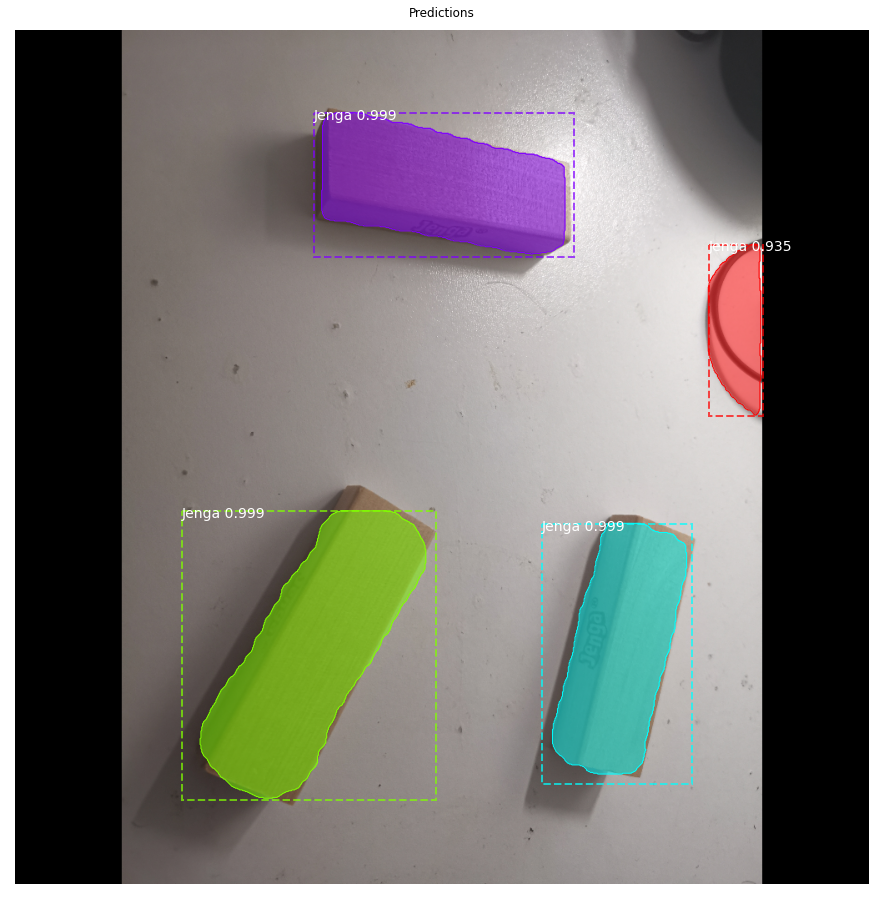

In [14]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)


# This is for predicting images which are not present in dataset
#image_id = random.choice(dataset.image_ids)
image1 = mpimg.imread('../dataset/val/sample10.jpeg')

    # Run object detection
print(len([image1]))
results1 = model.detect([image1], verbose=1)

    # Display results
ax = get_ax(1)
r1 = results1[0]
visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
                            dataset.class_names, r1['scores'], ax=ax,
                            title="Predictions1")

1
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    8.00000  max:  187.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   80.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


UnboundLocalError: local variable 'fig' referenced before assignment

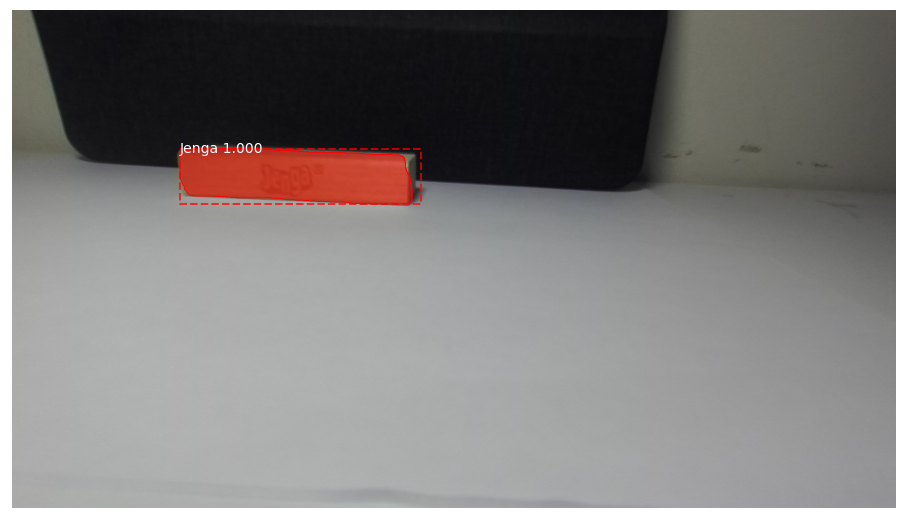

In [15]:
# This is for predicting images which are not present in dataset
#image_id = random.choice(dataset.image_ids)

img_name= '../../samples/sample79.jpeg'
image1 = mpimg.imread(img_name)

    # Run object detection
print(len([image1]))
results1 = model.detect([image1], verbose=1)

    # Display results
ax = get_ax(1)
r1 = results1[0]
visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
                            dataset.class_names, r1['scores'], ax=ax)
plt.savefig('../../masks/sample79_mask.jpeg')

1
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  241.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  122.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


UnboundLocalError: local variable 'fig' referenced before assignment

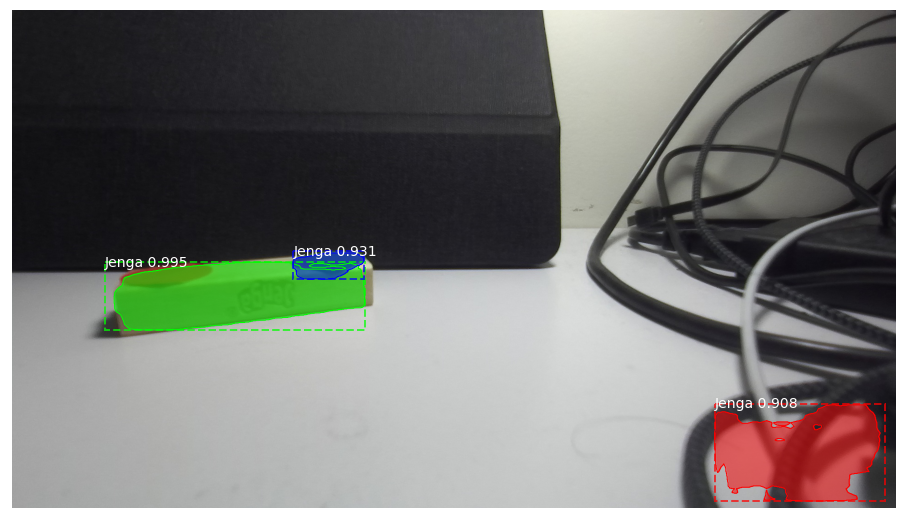

In [17]:
# This is for predicting images which are not present in dataset
#image_id = random.choice(dataset.image_ids)
import time
time1 = time.time()
image1 = mpimg.imread('../../circles/circle1_R.jpeg')

    # Run object detection
print(len([image1]))
results1 = model.detect([image1], verbose=1)

    # Display results
ax = get_ax(1)
r1 = results1[0]
visualize.display_instances(image1, r1['rois'], r1['masks'], r1['class_ids'],
                            dataset.class_names, r1['scores'], ax=ax)
#plt.savefig('./seg0_L.jpg')
time2 = time.time()
print(time2-time1)

In [15]:
# Create a Camera object
init_cap_params = sl.InitParameters()
#     init_cap_params.camera_resolution = sl.RESOLUTION.HD720
#     init_cap_params.depth_mode = sl.DEPTH_MODE.ULTRA
#     init_cap_params.coordinate_units = sl.UNIT.METER
#     init_cap_params.depth_stabilization = True
#     init_cap_params.camera_image_flip = False
#     init_cap_params.coordinate_system = sl.COORDINATE_SYSTEM.RIGHT_HANDED_Y_UP


cap = sl.Camera()
if not cap.is_opened():
    print("Opening ZED Camera...")
status = cap.open(init_cap_params)
if status != sl.ERROR_CODE.SUCCESS:
    print(repr(status))
    exit()

display = True
runtime = sl.RuntimeParameters()
left = sl.Mat()
ptcloud = sl.Mat()
depth_img = sl.Mat()
depth = sl.Mat()
#colors = visualize.random_colors(len(dataset.class_names))
res = sl.Resolution(1280, 720)

py_transform = sl.Transform()  # First create a Transform object for TrackingParameters object
tracking_parameters = sl.PositionalTrackingParameters(init_pos=py_transform)
tracking_parameters.set_as_static = True
err = cap.enable_positional_tracking(tracking_parameters)
if err != sl.ERROR_CODE.SUCCESS:
    exit(1)

running = True
while running:
    start_time = time.time()
    err_code = cap.grab(runtime)
    if err_code != sl.ERROR_CODE.SUCCESS:
        break

    cap.retrieve_image(left, sl.VIEW.LEFT, resolution=res)
    cap.retrieve_image(depth_img, sl.VIEW.DEPTH, resolution=res)
    cap.retrieve_measure(depth, sl.MEASURE.DEPTH, resolution=res)
    cap.retrieve_measure(ptcloud, sl.MEASURE.XYZ, resolution=res)
    ptcloud_np = np.array(ptcloud.get_data())

    img = cv2.cvtColor(left.get_data(), cv2.COLOR_RGBA2RGB)
    
    predictions = model.detect([img],verbose=1)  # We are replicating the same image to fill up the batch_size
    p = predictions[0]

    output = visualize.display_instances(img, p['rois'], p['masks'], p['class_ids'],dataset.class_names, p['scores'])

#     composite = output.copy()
#     if display:
#         cv2.imshow("COCO detections", composite)
#         cv2.imshow("ZED Depth", depth_img.get_data())
#         key = cv2.waitKey(10)
#         if key == 27:
#             break  # esc to quit


Opening ZED Camera...


KeyboardInterrupt: 

In [ ]:
colors = visualize.random_colors(len(dataset.class_names))
cap = cv2.VideoCapture(0)
ax = get_ax(1)
while True:

    _, frame = cap.read()
    predictions = model.detect([frame],verbose=1)  # We are replicating the same image to fill up the batch_size
    p = predictions[0]

    output = visualize.display_instances(frame, p['rois'], p['masks'], p['class_ids'],
                                     dataset.class_names, p['scores'], colors=colors, ax=ax)
    
    #cv2.imshow("Mask RCNN", output)
    k = cv2.waitKey(10)
    if k & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
# Create a Camera object
zed = sl.Camera()

# Create a InitParameters object and set configuration parameters
init_params = sl.InitParameters()
init_params.camera_resolution = sl.RESOLUTION.HD1080  # Use HD1080 video mode
init_params.camera_fps = 30  # Set fps at 30


# Open the camera
err = zed.open(init_params)
if err != sl.ERROR_CODE.SUCCESS:
    exit(1)

#     zed_serial = zed.get_camera_information().serial_number
#     print("Hello! This is my serial number: {}".format(zed_serial))
# Capture 50 frames and stop
i = 0
image = sl.Mat()
runtime_parameters = sl.RuntimeParameters()
while i < 50:
    # Grab an image, a RuntimeParameters object must be given to grab()
    if zed.grab(runtime_parameters) == sl.ERROR_CODE.SUCCESS:
        # A new image is available if grab() returns SUCCESS
        #LEFT
        zed.retrieve_image(image, sl.VIEW.LEFT)
        timestamp = zed.get_timestamp(sl.TIME_REFERENCE.CURRENT)  # Get the timestamp at the time the image was captured
        print("Image resolution: {0} x {1} || Image timestamp: {2}\n".format(image.get_width(), image.get_height(),
              timestamp.get_milliseconds()))
        img = image.get_data()
        img_name = '../../tests/sample{}_L.jpeg'.format(i+15)
        print(img_name)
        image.write(img_name)

        #detection
        ax = get_ax(1)
        image_detect = mpimg.imread(img_name)
        predictions = model.detect([image_detect],verbose=1)  # We are replicating the same image to fill up the batch_size
        p = predictions[0]
        visualize.display_instances(image_detect, p['rois'], p['masks'], p['class_ids'],
                        dataset.class_names, p['scores'], ax=ax)
        mask_name = '../../tests/sample{}_L_mask.jpeg'.format(i+15)
        plt.savefig(mask_name)


        #RIGHT
        zed.retrieve_image(image, sl.VIEW.RIGHT)
        timestamp = zed.get_timestamp(sl.TIME_REFERENCE.CURRENT)  # Get the timestamp at the time the image was captured
        print("Image resolution: {0} x {1} || Image timestamp: {2}\n".format(image.get_width(), image.get_height(),
              timestamp.get_milliseconds()))
        img = image.get_data()
        img_name = '../../tests/sample{}_R.jpeg'.format(i+15)
        print(img_name)
        image.write(img_name)

        #detection
        ax = get_ax(1)
        image_detect = mpimg.imread(img_name)
        predictions = model.detect([image_detect],verbose=1)  # We are replicating the same image to fill up the batch_size
        p = predictions[0]
        visualize.display_instances(image_detect, p['rois'], p['masks'], p['class_ids'],
                        dataset.class_names, p['scores'], ax=ax)
        mask_name = '../../tests/sample{}_R_mask.jpeg'.format(i+15)
        plt.savefig(mask_name)

        input()
        i = i + 1

# Close the camera
zed.close()